In this project, I am working on a classification task on a dataset available on Kaggle, accessible through this [link](https://www.kaggle.com/competitions/cat-in-the-dat/data). The primary objective of this experiment is to explore various encoding schemes suitable for different categorical features within the dataset. By employing these encoding techniques, I aim to enhance the performance of the classification models. To determine the most promising approach, I apply four distinct machine learning models. To ensure optimal performance, I fine-tune the hyperparameters of each model using GridSearchCV.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import sparse

from imblearn.combine import SMOTETomek
from collections import Counter
import gdown

In [ ]:
%%capture
!pip install imbalanced-learn
!pip install pandas gdown

In [ ]:
np.random.seed(64)

In [ ]:
train_file_dir = os.path.join(os.getcwd(), 'data/train.csv')

In [ ]:
train_data = pd.read_csv(train_file_dir)

In [ ]:
train_data

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1


The data contains binary features (bin_\*), nominal features (nom_\*), ordinal features (ord_\*) as well as (potentially cyclical) day (of the week) and month features.

In [ ]:
train_data = train_data.drop('id', axis=1)
train_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,Piano,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1


Here is a summary of the dataset's structure and characteristics is provided.

In [ ]:
train_data.shape

(300000, 24)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

**Show statistical measures for each column in the dataset**

In [ ]:
train_data.describe()

,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


In [ ]:
categorical_features = train_data.select_dtypes(include=['object']).columns
categorical_features

Index(['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5',
       'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5'],
      dtype='object')

In [ ]:
numerical_features = train_data.select_dtypes(exclude=['object']).drop('target', axis=1).columns
numerical_features

Index(['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month'], dtype='object')

**Checking missing values and duplicate values**

Checking for missing values and duplicate values before using data for machine learning is crucial. Missing values can introduce bias, affect accuracy, and prevent algorithm compatibility. Duplicate values can skew results and impact statistical properties.

In [ ]:
missing_values = train_data.isnull().sum()
missing_values

bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [ ]:
train_data[train_data.duplicated()]

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target


# Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

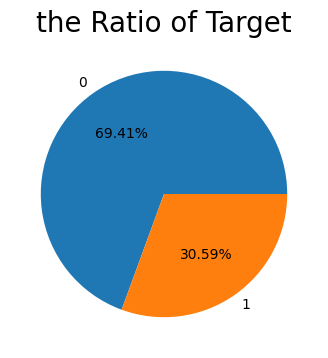

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(x =train_data['target'].value_counts() ,autopct = '%1.2f%%' ,labels = train_data['target'].value_counts().index)
plt.title('the Ratio of Target',fontsize=20)
plt.show

In [ ]:
for col in ['bin_0','bin_1','bin_2','bin_3','bin_4']:
    print(f'Distribution For {col}\n')
    print(train_data[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train_data.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For bin_0

0    261749
1     38251
Name: bin_0, dtype: int64

Target Frequency For bin_0

bin_0  target
0      0         181786
       1          79963
1      0          26450
       1          11801
Name: target, dtype: int64
********************
Distribution For bin_1

0    223018
1     76982
Name: bin_1, dtype: int64

Target Frequency For bin_1

bin_1  target
0      0         149434
       1          73584
1      0          58802
       1          18180
Name: target, dtype: int64
********************
Distribution For bin_2

0    185033
1    114967
Name: bin_2, dtype: int64

Target Frequency For bin_2

bin_2  target
0      0         129238
       1          55795
1      0          78998
       1          35969
Name: target, dtype: int64
********************
Distribution For bin_3

T    153535
F    146465
Name: bin_3, dtype: int64

Target Frequency For bin_3

bin_3  target
F      0         101151
       1          45314
T      0         107085
       1          46450
Name

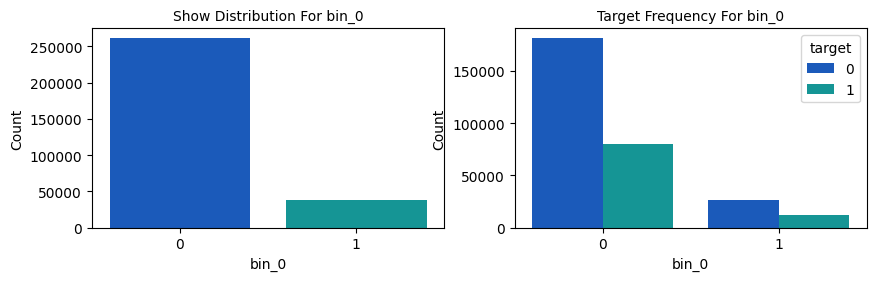

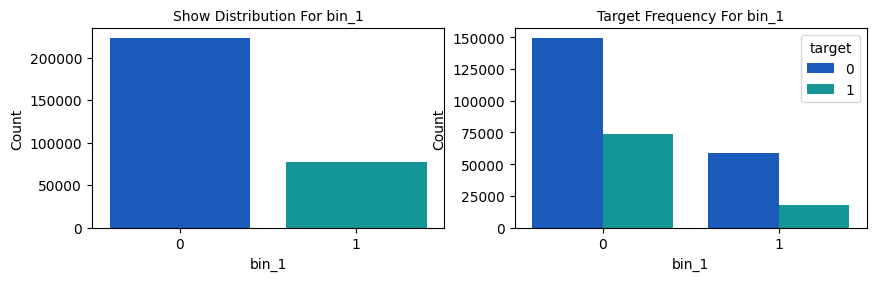

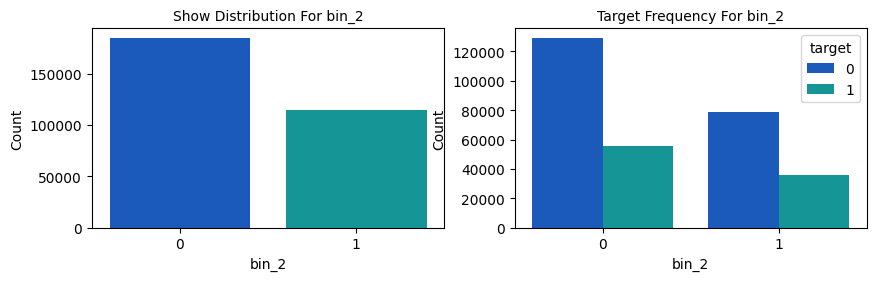

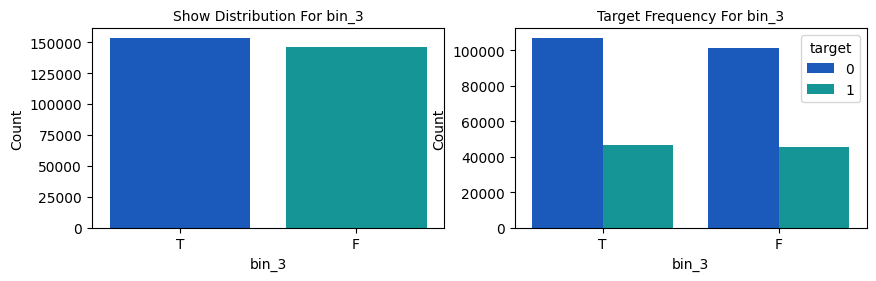

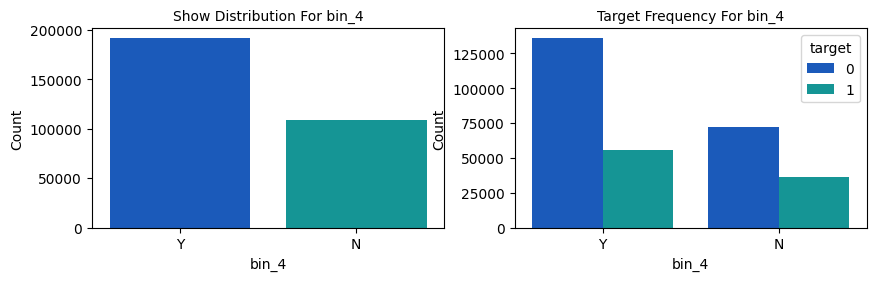

In [ ]:
x=1
for col in ['bin_0','bin_1','bin_2','bin_3','bin_4']:
    plt.figure(figsize=(10,15))
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col],hue=train_data['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1

In [ ]:
for col in ['nom_0','nom_1','nom_2','nom_3','nom_4']:
    print(f'Distribution For {col}\n')
    print(train_data[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train_data.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For nom_0

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

Target Frequency For nom_0

nom_0  target
Blue   0         72914
       1         23252
Green  0         85682
       1         41659
Red    0         49640
       1         26853
Name: target, dtype: int64
********************
Distribution For nom_1

Trapezoid    101181
Square        49597
Star          45904
Circle        37320
Polygon       36143
Triangle      29855
Name: nom_1, dtype: int64

Target Frequency For nom_1

nom_1      target
Circle     0         28152
           1          9168
Polygon    0         24741
           1         11402
Square     0         32787
           1         16810
Star       0         31645
           1         14259
Trapezoid  0         71833
           1         29348
Triangle   0         19078
           1         10777
Name: target, dtype: int64
********************
Distribution For nom_2

Lion       101295
Cat         49659
Snake       45979
Dog   

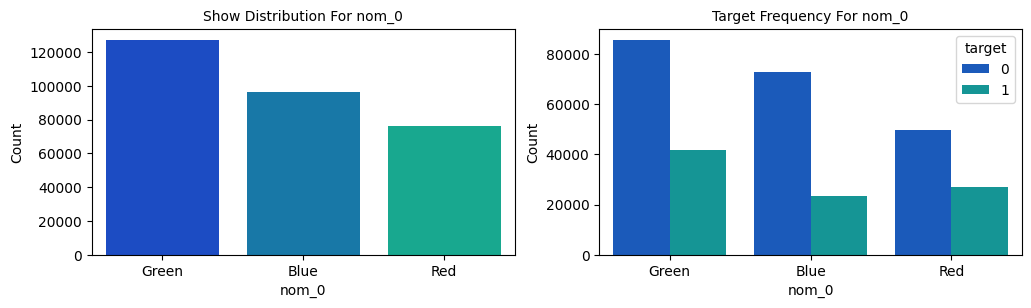

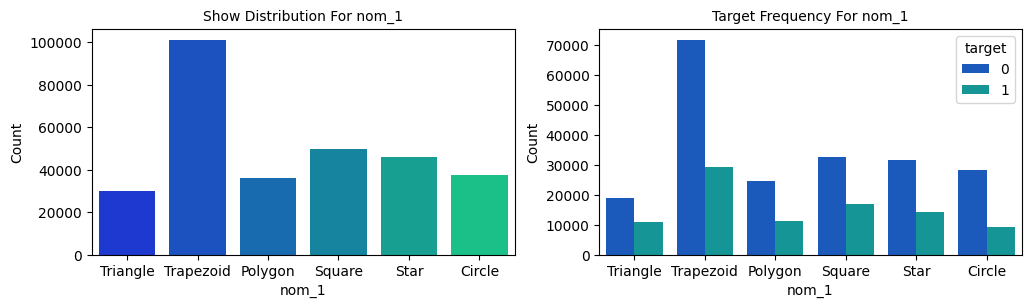

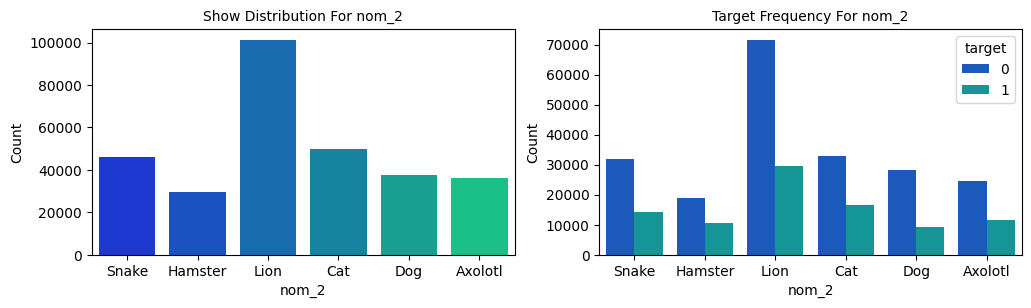

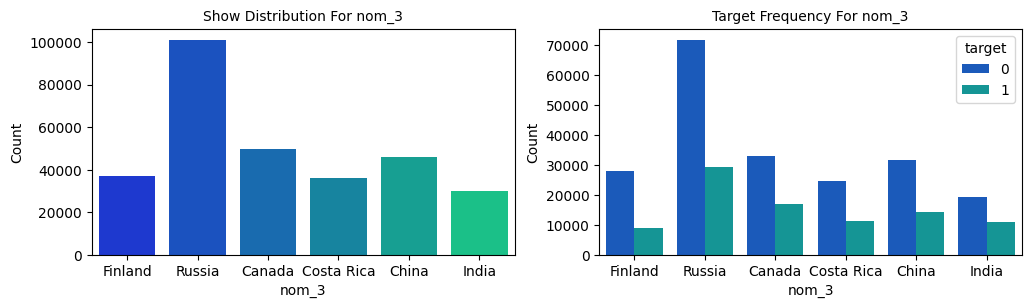

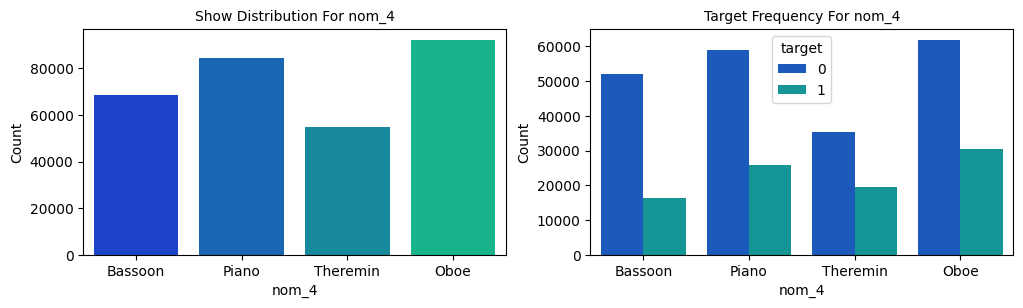

In [ ]:
x=1
for col in ['nom_0','nom_1','nom_2','nom_3','nom_4']:
    plt.figure(figsize=(12,17))
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col],hue=train_data['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1

In [ ]:
for col in ['ord_0','ord_1','ord_2','ord_3','ord_4']:
    print(f'Distribution For {col}\n')
    print(train_data[col].value_counts())
    print(f'\nTarget Frequency For {col}\n')
    print(train_data.groupby([col,'target'])['target'].count())
    print('*'*20)

Distribution For ord_0

1    194846
2     66438
3     38716
Name: ord_0, dtype: int64

Target Frequency For ord_0

ord_0  target
1      0         140646
       1          54200
2      0          44202
       1          22236
3      0          23388
       1          15328
Name: target, dtype: int64
********************
Distribution For ord_1

Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: ord_1, dtype: int64

Target Frequency For ord_1

ord_1        target
Contributor  0         30930
             1         11941
Expert       0         17115
             1          7950
Grandmaster  0         46156
             1         31272
Master       0         18092
             1          9961
Novice       0         95943
             1         30640
Name: target, dtype: int64
********************
Distribution For ord_2

Freezing       99816
Lava Hot       63908
Boiling Hot    60627
Cold           33768
Hot            22227
War

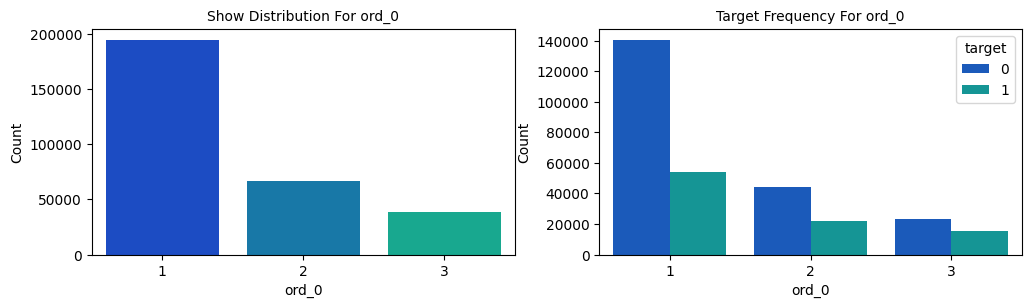

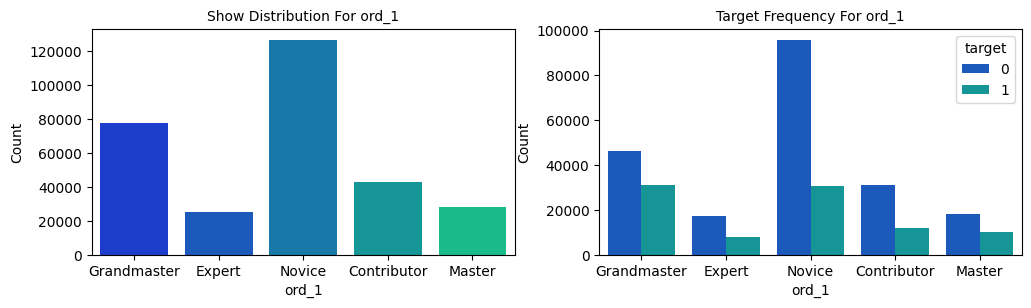

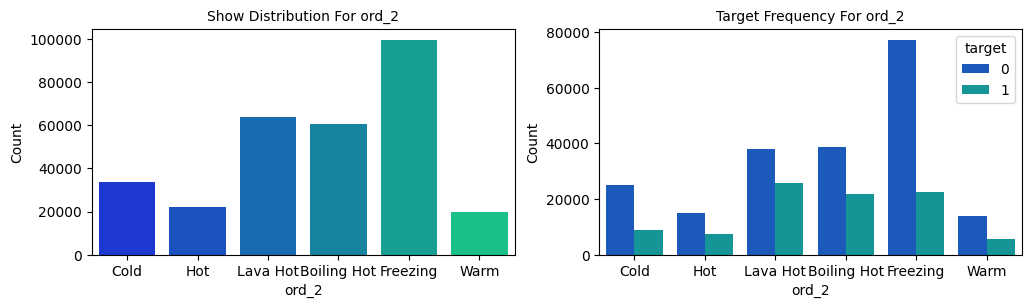

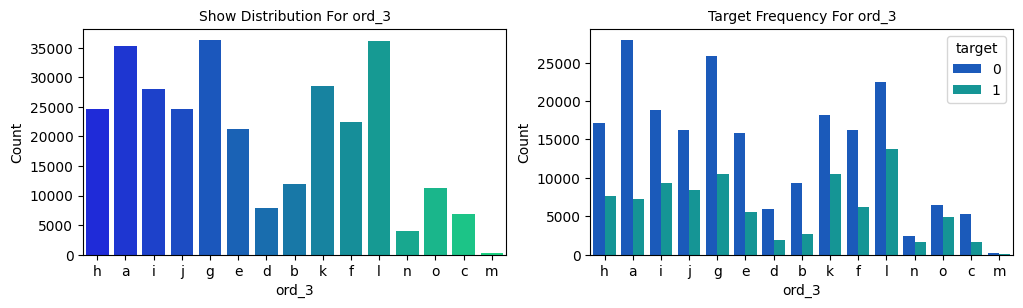

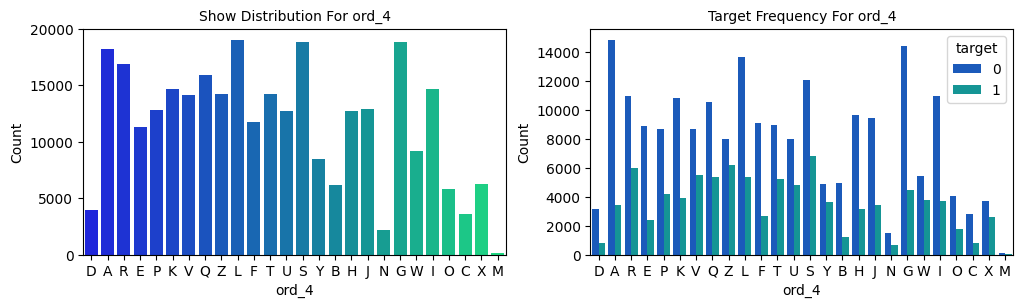

In [ ]:
x=1
for col in ['ord_0','ord_1','ord_2','ord_3','ord_4']:
    plt.figure(figsize=(12,17))
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col], palette='winter')
    plt.title(f'Show Distribution For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1
    plt.subplot(5,2,x)
    sns.countplot(x =train_data[col],hue=train_data['target'],palette='winter')
    plt.title(f'Target Frequency For {col}',fontsize=10)
    plt.xlabel(f'{col}',fontsize=10)
    plt.ylabel('Count',fontsize=10)
    x+=1

# Feature engineering

The dataset consists of different kind of columns, including numerical and categorical columns.

In [ ]:
train = train_data.drop('target', axis=1)

The two columns 'bin_3' and 'bin_4' are representing binary data that are not in numeric format. One column was represented by 'Y' and 'N' values, while the other column used 'T' and 'F' values. In order to facilitate analysis and modeling, I transformed these columns into a numeric format using a simple mapping technique.

In [ ]:
train['bin_3'] = train['bin_3'].map({'F':0, 'T': 1})
train['bin_4'] = train['bin_4'].map({'N':0, 'Y': 1})

**Ordinal Encoding**

There are 5 ordinal columns in the dataset namely 'ord1' to 'ord5' that consist of string values. There are two approach for converting their values to ordinal numbers: manual mapping and using the OrdinalEncoder() function.

There are two columns ('ord_1', 'ord_2') in the dataset which their values indicate inherent orders. For these two columns I chose to use manual mapping approach by defining a mapping dictionary to assign numerical values to the string categories.
I used this approach because the mapping of these two string categories to numerical values follows a specific order that is known and meaningful.

Second approach is to use OrdinalEncoder() which is a function provided by sklearn library, that automatically encodes categorical variables into ordinal numbers. It assigns a unique numerical value to each distinct category in the ordinal columns, based on the order in which they appear in the dataset.

For the remaining three ordinal columns ('ord_3', 'ord_4', 'ord_5') I used this approach because the order of the string categories in these  columns does not have a specific meaning and cannot be manually mapped in a meaningful way.

In [ ]:
train['ord_1'] = train['ord_1'].map({'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4})
train['ord_2'] = train['ord_2'].map({'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5})

In [ ]:
ord_cols = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder()
train[ord_cols] = ord_encoder.fit_transform(train[ord_cols])

**Scaling the ordinal data**

In [ ]:
ord12345 = ['ord_' + str(i) for i in range(6)]
minmax_scaler = MinMaxScaler()
train[ord12345] = minmax_scaler.fit_transform(train[ord12345])

**One-Hot Encoding**

For other columns I used OneHotEncoding which is used to convert categorical variables with multiple categories into a binary representation. It creates new binary columns for each category, where a value of 1 indicates the presence of the category and 0 indicates its absence. This encoding is useful when there is no ordinal relationship between the categories.

In [ ]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
encoder = OneHotEncoder()
order_data_encoded = encoder.fit_transform(train[nom_cols])

In [ ]:
date = ['day', 'month']
day_data_encoded = encoder.fit_transform(train[date])

After encoding the columns using OneHotEncoder, the original columns should be removed from the train data

In [ ]:
train = train.drop(nom_cols, axis=1)
train = train.drop(date, axis=1)

In [ ]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,0,1,1,0.5,1.0,0.2,0.500000,0.12,0.712042
1,0,1,0,1,1,0.0,1.0,0.6,0.000000,0.00,0.486911
2,0,0,0,0,1,0.0,0.5,1.0,0.500000,0.68,0.162304
3,0,1,0,0,1,0.0,1.0,0.8,0.571429,0.12,0.701571
4,0,0,0,0,0,0.0,1.0,0.0,0.000000,0.68,0.827225


Here we stack the sparse vectors of columns horizontally

In [ ]:
train_sprs = sparse.hstack([sparse.csr_matrix(train), order_data_encoded, day_data_encoded], format='csr')
train_sprs

<300000x16215 sparse matrix of type '<class 'numpy.float64'>'
	with 5497975 stored elements in Compressed Sparse Row format>

The following code divides the dataset into training, validation, and testing sets, with approximately 80% for training, 10% for validation, and 10% for testing.

In [ ]:
X = train_sprs
Y = train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,stratify=Y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42,stratify=y_test)

# Machine learning Part

In the following section, 4 different machine learning models will be trained on the data and will be evaluated on validation set to select the most promising model for final prediction on test data.

Before fitting the model on train data, they are tunned using GridSearchCV on validation set to find the best hyper-parameters.

# Linear Regression

In [ ]:
%%capture
# Define the hyperparameter grid
param_grid_LR = {'C': [0.1, 1, 10],'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs']}

grid_search_LR = GridSearchCV(LogisticRegression(), param_grid_LR, cv=5,
                            n_jobs = 2,
                           )
grid_search_LR.fit(X_val, y_val)
best_params_LR = grid_search_LR.best_params_

In [ ]:
print(best_params_LR)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
LR_model = LogisticRegression(solver=best_params_LR['solver'], penalty = best_params_LR['penalty'], C = best_params_LR['C'])
# LR_model = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.1)
LR_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
y_pred_LR = LR_model.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     20823
           1       0.66      0.47      0.55      9177

    accuracy                           0.76     30000
   macro avg       0.73      0.68      0.69     30000
weighted avg       0.75      0.76      0.75     30000



# Decision Tree

In [ ]:
tuned_param_dt = [{'max_depth': list(range(1,20))}]
grid_search_DT = GridSearchCV(DecisionTreeClassifier(), tuned_param_dt, cv=5,
                            n_jobs = 2,
                           )
grid_search_DT.fit(X_val, y_val)
best_params_DT = grid_search_DT.best_params_
print(best_params_DT)

{'max_depth': 5}


In [ ]:
DT_model = DecisionTreeClassifier(max_depth=best_params_DT['max_depth'])
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_DT = DT_model.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_DT))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81     20823
           1       0.56      0.28      0.37      9177

    accuracy                           0.71     30000
   macro avg       0.65      0.59      0.59     30000
weighted avg       0.68      0.71      0.68     30000



# Random Forest

In [ ]:
tuned_param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), tuned_param_rf, cv=5,
                            n_jobs = 2,
                           )
grid_search_rf.fit(X_val, y_val)
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_depth': None, 'n_estimators': 100}


In [ ]:
RF_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth = best_params_rf['max_depth'])
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = RF_model.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_RF))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83     20823
           1       0.79      0.09      0.17      9177

    accuracy                           0.71     30000
   macro avg       0.75      0.54      0.50     30000
weighted avg       0.74      0.71      0.63     30000



# K-nearest neighbor

In [ ]:
# Define the hyperparameter grid
param_grid_knn = {'n_neighbors': range(1,10)}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5,
                            n_jobs = 2,
                           )
grid_search_knn.fit(X_val, y_val)
best_params_knn = grid_search_knn.best_params_
print(best_params_knn)

{'n_neighbors': 8}


In [ ]:
#best_params_knn['n_neighbors']
KNN_model = KNeighborsClassifier(n_neighbors = best_params_knn['n_neighbors'])
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred_knn = KNN_model.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81     20823
           1       0.53      0.15      0.23      9177

    accuracy                           0.70     30000
   macro avg       0.62      0.55      0.52     30000
weighted avg       0.66      0.70      0.64     30000



# Apply SMOTE oversampling

In this project, I encountered an imbalanced dataset, where the distribution of classes was somwhow uneven. To mitigate the challenges posed by this class imbalance, I decided to utilize the SMOTE (Synthetic Minority Over-sampling Technique) oversampling algorithm. By applying SMOTE, I was able to address the issue of limited instances in the minority class by generating synthetic examples that accurately represented the minority class. This approach allowed me to balance the class distribution and provide the model with a more representative training set.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 166589, 1: 166589}


<function matplotlib.pyplot.show(close=None, block=None)>

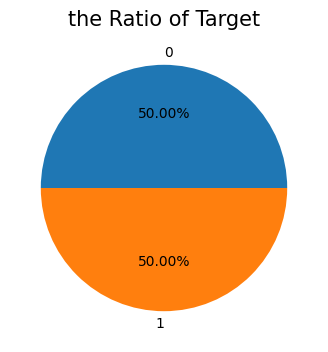

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(x =y_resampled.value_counts() ,autopct = '%1.2f%%' ,labels = y_resampled.value_counts().index)
plt.title('the Ratio of Target',fontsize=15)
plt.show

As it is shown, the distribution of classes are balanced now.

In [ ]:
# Fitting the model with best hyper-parameters
LR_model_2 = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.1)
LR_model_2.fit(X_resampled, y_resampled)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
y_pred_LR_2 = LR_model_2.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_LR_2))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78     20823
           1       0.53      0.71      0.61      9177

    accuracy                           0.72     30000
   macro avg       0.69      0.72      0.70     30000
weighted avg       0.75      0.72      0.73     30000



# Prediction on test set
After assessing the performance of the four models on the validation set, it was evident that the Linear Regression model produced the best results. Hence, it is used to make predictions on the test data.

**Prediction on the LR model trained on original dataset**

In [ ]:
y_pred_Test = LR_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_Test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     20824
           1       0.66      0.46      0.54      9176

    accuracy                           0.76     30000
   macro avg       0.72      0.68      0.69     30000
weighted avg       0.75      0.76      0.75     30000



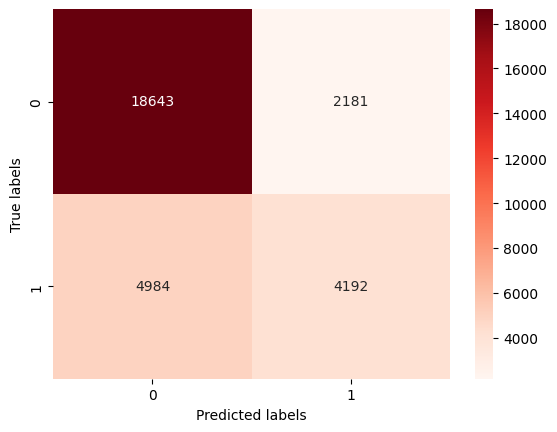

In [ ]:
cm = confusion_matrix(y_test, y_pred_Test)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

**Prediction on the LR model trained on over-sampled dataset**

In [ ]:
y_pred_Test_2 = LR_model_2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_Test_2))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78     20824
           1       0.53      0.70      0.60      9176

    accuracy                           0.72     30000
   macro avg       0.69      0.71      0.69     30000
weighted avg       0.75      0.72      0.73     30000



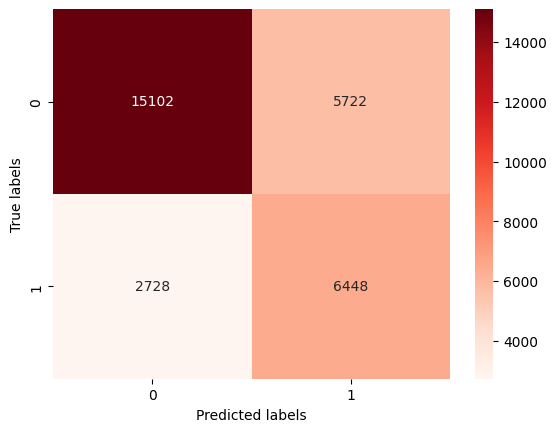

In [ ]:
cm = confusion_matrix(y_test, y_pred_Test_2)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

As it is clear, after over sampling the performance of the model on minority class improved.